# Color Threshold, Green Screen

### Import resources

In [183]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [184]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


In [185]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

### Define the color threshold

In [186]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([10,230,15]) 
upper_green = np.array([230,255,230])

### Create a mask

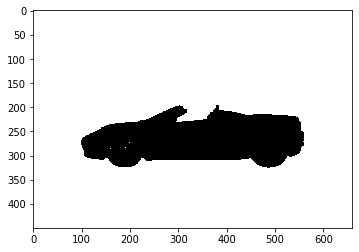

In [187]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

In [188]:
# Mask the image to let the car show through
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]


### Mask and add a background image

In [189]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

In [190]:
## TODO: Crop it or resize the background to be the right size (450x660)
crop_background = background_image[0:450, 0:660]
masked_background = np.copy(crop_background)

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
masked_background[mask == 0] = [0, 0, 0]

### Create a complete image

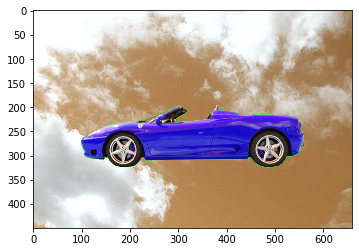

In [191]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
finished_img = masked_image + masked_background
plt.imshow(finished_img)